                 R&D Spend  Administration  Marketing Spend  Profit
R&D Spend             1.00            0.24             0.72    0.97
Administration        0.24            1.00            -0.03    0.20
Marketing Spend       0.72           -0.03             1.00    0.75
Profit                0.97            0.20             0.75    1.00


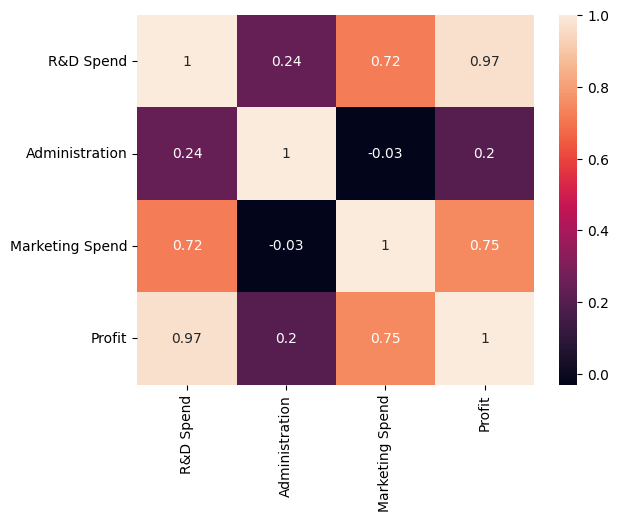

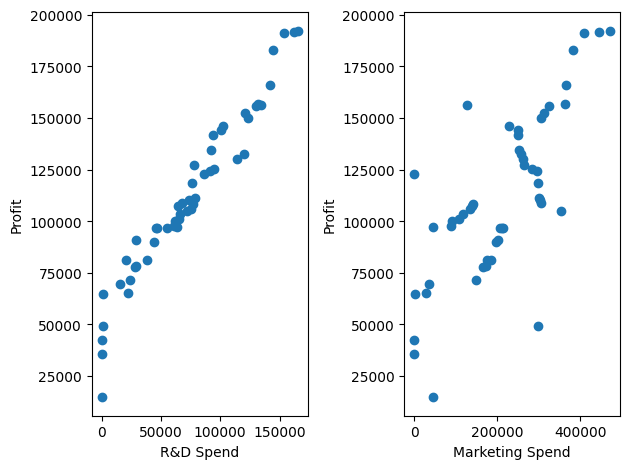

RMSE and R2 (training data): 9358.583115148496, 0.9436198878593198
RMSE and R2 (testing data): 7073.857168705303, 0.9683604384024198


"\nThe model's performance looks pretty good with RMSE of 9358.58 and 94.36% respectively on training data and 7073.85 and 96.84% on testing data. Lower value of RMSE on testing data indicates that the model is not overfitting.\n"

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt


#Load data from csv file
data = pd.read_csv('/content/sample_data/50_Startups.csv')
# print(data)

#Drop the state column to create dataframe
df = data.drop(columns='State')

# Calculate correlations and display correlation using heatmap
correlation = df.corr().round(2)
print(correlation)
sns.heatmap(data=correlation, annot=True)
plt.show()


# Select 'R&D Spend' and 'Marketing Spend' independent variables and 'profit' as the dependent variable
x = df[['R&D Spend', "Marketing Spend"]]
y = df[['Profit']]



#Ploting explanatory variables against profit
plt.subplot(1, 2, 1)
plt.scatter(df['R&D Spend'], df['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

plt.subplot(1, 2, 2)
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

#Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Initialize and train the linear regression model with training data
model = LinearRegression()
model.fit(x_train, y_train)

# Evaluate the model on training data
y_train_predict = model.predict(x_train)
rmse_train = root_mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)
print(f"RMSE and R2 (training data): {rmse_train}, {r2_train}")

# Evaluate the model on testing data
y_test_predict = model.predict(x_test)
rmse_test = root_mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)
print(f"RMSE and R2 (testing data): {rmse_test}, {r2_test}")

'''
a. The variables inside the dataset are: R&D Spend', 'Administration', 'Marketing Spend', 'State', and 'Profit'

b. From the heatmap, R&D Spend shows a strong correlation with profit (0.97) and Marketing Spend shows a moderate correlation with profit (0.75).
 However, Administration shows almost no correlation (0.20).

c. For our model, I will select two features (R&D Spend, and Marketing Spend) as independent variables and Profit as the target variable.

The model's performance looks pretty good with RMSE of 9358.58 and 94.36% respectively on training data and 7073.85 and 96.84% on
 testing data. Lower value of RMSE on testing data indicates that the model is not overfitting.

'''